# **Preliminaries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')

# **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/Data_XY.csv'
data = pd.read_csv(path)

In [ ]:
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)

(525, 4186)


In [ ]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186)  )
model.add(ks.layers.Dense(20, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(19, activation=ks.activations.softsign)  )
model.add(ks.layers.Dense(209, activation=ks.activations.softmax)  )
model.add(ks.layers.Dense(211, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(20, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(20, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(1, activation=ks.activations.linear)  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                83740     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                399       
_________________________________________________________________
dense_3 (Dense)              (None, 209)               4180      
_________________________________________________________________
dense_4 (Dense)              (None, 211)               44310     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                4240      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                4

In [ ]:
model.compile( loss='mean_squared_error' , 
              optimizer='adam',metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
9/9 [==============================] - 1s 26ms/step - loss: 14.3966 - mse: 14.3966 - val_loss: 10.2379 - val_mse: 10.2379
Epoch 2/150
9/9 [==============================] - 0s 7ms/step - loss: 9.0086 - mse: 9.0086 - val_loss: 5.3904 - val_mse: 5.3904
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 4.7546 - mse: 4.7546 - val_loss: 4.1704 - val_mse: 4.1704
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 4.1025 - mse: 4.1025 - val_loss: 4.6319 - val_mse: 4.6319
Epoch 5/150
9/9 [==============================] - 0s 8ms/step - loss: 4.1915 - mse: 4.1915 - val_loss: 4.2676 - val_mse: 4.2676
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 3.9158 - mse: 3.9158 - val_loss: 3.9928 - val_mse: 3.9928
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 3.8005 - mse: 3.8005 - val_loss: 3.7535 - val_mse: 3.7535
Epoch 8/150
9/9 [==============================] - 0s 7ms/step - loss: 3.5768 - mse: 3.5768 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


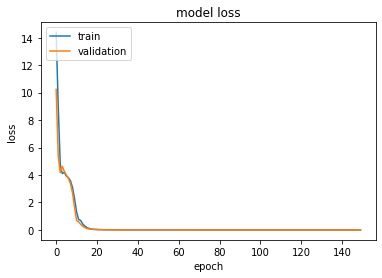

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'y')

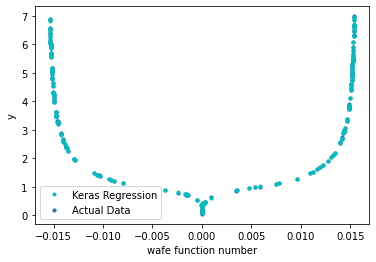

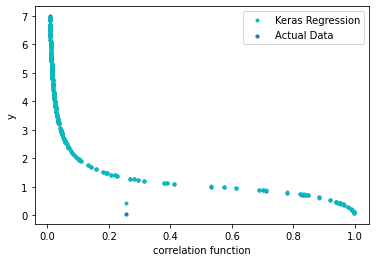

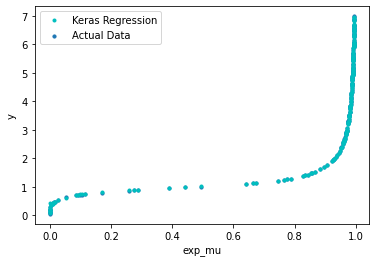

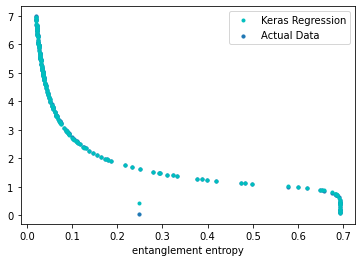

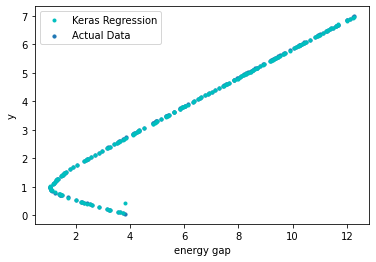

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,300],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,300],y_pred,'.', label="Keras Regression",c='c')
plt.legend()
plt.xlabel('wafe function number')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,20],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,20],y_pred,'.', label="Keras Regression",c = 'c')
plt.legend()
plt.xlabel('correlation function')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,70],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,70],y_pred,'.', label="Keras Regression", c = 'c')
plt.legend()
plt.xlabel('exp_mu')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,88],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,88],y_pred,'.', label="Keras Regression", c = 'c')
plt.legend()
plt.xlabel('entanglement entropy')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,78],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,78],y_pred,'.', label="Keras Regression", c = 'c')
plt.legend()
plt.xlabel('energy gap')
plt.ylabel('y')